# 6.4 Supervised Machine Learning 

## Outine

### 1. Import data and libraries
### 2. Check and clean data
### 3. Explore the data visually
### 4. Prepare the data for regression analysis
### 5. Perform linear regression analysis
### 6. Visualize the results & reflect


# 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Set the option to display graphs within the notebook.

%matplotlib inline

In [3]:
#Define file path

path = r'C:\Users\Caroline\Documents\Career Foundry\06 2023 EVCS washington state'

In [4]:
# Import data

#df_present = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'WA_present.pkl'))

In [5]:
# Import data
df_hist = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'WA_hist.pkl'))

# 2. Data checking and cleaning 

    #Hypotheses
    Hyp 1 - Growth Rate of EV registrations > rate of population growth - X = rate of population growth over time, y = rate of EV% growth
    Hyp 2 - % of EV registrations has increased over time - X = time, y = %of EV of vehicle registrations
    Hyp 3 - Counties with denser populations have higher rates of EV ownership - X = population density, y = Rate of EV ownership
    Hyp 4 - (cyclical) increaseing EV per population increases the #EVCS per county - X: EV per population, y = EVCS/county

- Of these hypotheses, Hypothesis 2 is a good candidate to for testing with machine learning. Hyp 3 may be evaluated with linear regression but with only 39 counties the data would be limited.

In [6]:
df_hist.columns

Index(['Date', 'County', 'BEV Registered', 'PHEV Registerd', 'EV Total',
       'Non-EV Total', 'Total Vehicles', 'BEV %', 'Overall EV %', 'Year',
       'Month', 'Station Count', 'Cum_CS_count', 'Cumulative EVCS WA',
       'Estimated Population', 'EVs per person', 'Total Vehicles per person'],
      dtype='object')

In [7]:
#Visual check of df
df_hist. head(10)

,Date,County,BEV Registered,PHEV Registerd,EV Total,Non-EV Total,Total Vehicles,BEV %,Overall EV %,Year,Month,Station Count,Cum_CS_count,Cumulative EVCS WA,Estimated Population,EVs per person,Total Vehicles per person
0,2014-06-01,Adams,0,0,0,0,0,NaN,NaN,2014,6,1,1,9,19482,NaN,NaN
1,2017-01-01,Adams,1,1,2,17252,17254,50.000000,0.011592,2017,1,0,1,309,19968,0.000100,0.864083
2,2017-02-01,Adams,2,2,4,17197,17201,50.000000,0.023254,2017,2,0,1,316,19984,0.000200,0.860739
3,2017-03-01,Adams,2,4,6,17177,17183,33.333333,0.034918,2017,3,0,1,322,20000,0.000300,0.859150
4,2017-04-01,Adams,2,3,5,17200,17205,40.000000,0.029061,2017,4,0,1,331,20015,0.000250,0.859605
5,2017-05-01,Adams,2,3,5,17276,17281,40.000000,0.028934,2017,5,0,1,345,20031,0.000250,0.862713
6,2017-06-01,Adams,2,3,5,17310,17315,40.000000,0.028877,2017,6,0,1,349,20047,0.000249,0.863720
7,2017-07-01,Adams,3,3,6,17307,17313,50.000000,0.034656,2017,7,0,1,358,20062,0.000299,0.862975
8,2017-08-01,Adams,3,3,6,17280,17286,50.000000,0.034710,2017,8,0,1,365,20078,0.000299,0.860942
9,2017-09-01,Adams,3,3,6,17386,17392,50.000000,0.034499,2017,9,0,1,372,20094,0.000299,0.865532


In [8]:
df_hist.shape

(3203, 17)

In [9]:
# Check for missing values

df_hist.isnull().sum()


Date                           0
County                         0
BEV Registered                 0
PHEV Registerd                 0
EV Total                       0
Non-EV Total                   0
Total Vehicles                 0
BEV %                        200
Overall EV %                 200
Year                           0
Month                          0
Station Count                  0
Cum_CS_count                   0
Cumulative EVCS WA             0
Estimated Population           0
EVs per person               200
Total Vehicles per person    200
dtype: int64

In [10]:
# Drop rows with any NaN values
df_hist = df_hist.dropna()

In [11]:
# Check for missing values

df_hist.isnull().sum()

Date                         0
County                       0
BEV Registered               0
PHEV Registerd               0
EV Total                     0
Non-EV Total                 0
Total Vehicles               0
BEV %                        0
Overall EV %                 0
Year                         0
Month                        0
Station Count                0
Cum_CS_count                 0
Cumulative EVCS WA           0
Estimated Population         0
EVs per person               0
Total Vehicles per person    0
dtype: int64

In [14]:
df_hist.shape


(3003, 17)

In [15]:
# Check for duplicate values
dups = df_hist.duplicated()

In [16]:
dups.shape # No dups

(3003,)

# 3. Explore the data visually

In [17]:
#For Overall EV %:
print(f"Mean: {df_hist['Overall EV %'].mean()}")
print(f"Median: {df_hist['Overall EV %'].median()}")
print(f"Max Value: {df_hist['Overall EV %'].max()}")

Mean: 0.49866789474863477
Median: 0.30219945163808115
Max Value: 4.523835959408648


 - data indicates that there may be outliers to the right of the mean

C:\Users\Caroline\AppData\Local\Temp\ipykernel_7944\2144455789.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_hist['Overall EV %'], bins=25)


<AxesSubplot:xlabel='Overall EV %', ylabel='Density'>

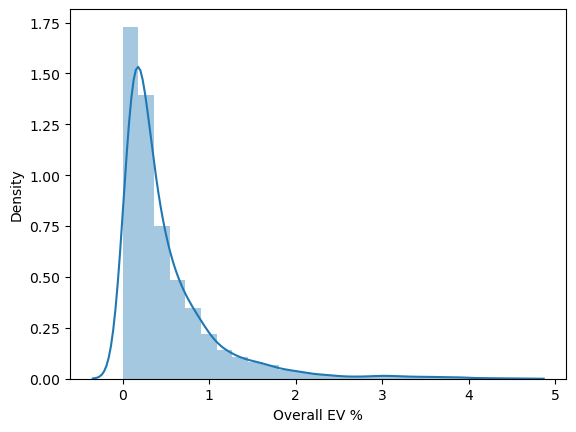

In [18]:
#plot a histogram of the Overall EV%
sns.distplot(df_hist['Overall EV %'], bins=25)

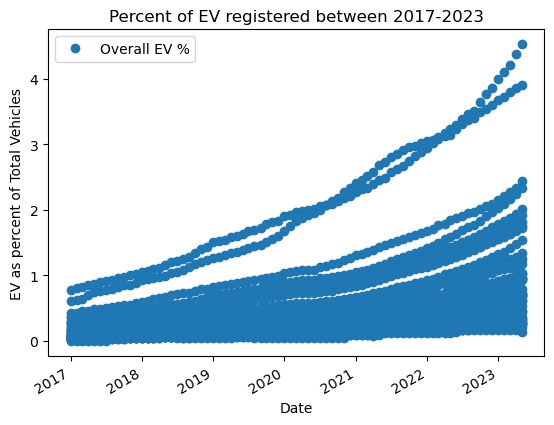

In [19]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_hist.plot(x = 'Date', y='Overall EV %',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Percent of EV registered between 2017-2023')  
plt.xlabel('Date')  
plt.ylabel('EV as percent of Total Vehicles')  
plt.show()

# 4. Prepare the data for regression analysis

In [20]:
#  Extract year and month from the 'Date' column
df_hist['Year'] = df_hist['Date'].dt.year
df_hist['Month'] = df_hist['Date'].dt.month

In [21]:
# Convert 'Year' and 'Month' into a single number representing the time 
# Month is multiplied by 8.3 because 100/12 = 8.3333
df_hist['Time'] = df_hist['Year'] * 100 + df_hist['Month'] *8.3

In [22]:
#  Reshape the variables into NumPy arrays and put them into separate objects.

X = df_hist['Time'].values.reshape(-1, 1)
y = df_hist['Overall EV %'].values.reshape(-1, 1)

In [23]:
# Check X and y arrays
X

array([[201708.3],
       [201716.6],
       [201724.9],
       ...,
       [202324.9],
       [202333.2],
       [202341.5]])

In [24]:
y

array([[0.01159152],
       [0.02325446],
       [0.03491823],
       ...,
       [0.30842209],
       [0.31731176],
       [0.32998228]])

# 5. Perform linear regression analysis

In [25]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [26]:
# Create a regression object, which will be fit onto the training set.
regression = LinearRegression()  

In [27]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [28]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

In [29]:
# Sort X_test and y_test based on the date for correct plotting
sort_indices = X_test[:, 0].argsort()
X_test_sorted = X_test[sort_indices]
y_test_sorted = y_test[sort_indices]

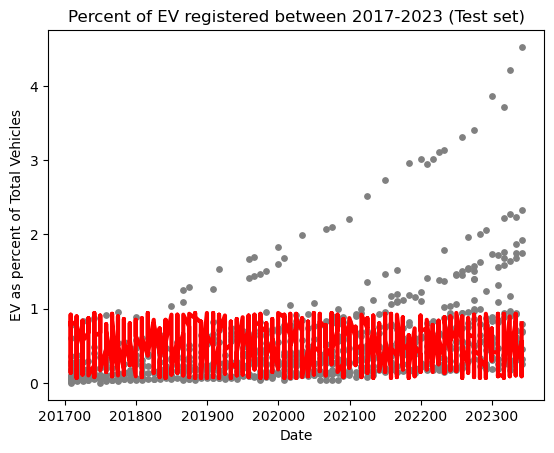

In [30]:
# Create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test_sorted[:, 0], y_test_sorted[:, 0], color='gray', s=15)
plot_test.plot(X_test_sorted[:, 0], y_predicted, color='red', linewidth=3)
plot_test.title('Percent of EV registered between 2017-2023 (Test set)')
plot_test.xlabel('Date')
plot_test.ylabel('EV as percent of Total Vehicles')
plot_test.show()

In [31]:
# Calculate mean squared error
rmse = mean_squared_error(y_test, y_predicted)

In [32]:
# Calculate R-squared
r2_hyp2 = r2_score(y_test, y_predicted)

In [33]:
# Print the model summary statistics to evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score : ', r2_hyp2)

Slope: [[0.00138199]]
Mean squared error:  0.24602302570207996
R2 score :  0.19061880940975895


In [34]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.935340,0.803680
1,0.162134,0.573164
2,0.481609,0.205001
3,1.193697,0.699892
4,0.199760,0.308236
5,0.305344,0.918938
6,0.167514,0.654010
7,0.795165,0.688422
8,0.281778,0.366141
9,0.277478,0.135625


# 6. Visualize the results & reflect

In [35]:
#Compare the regression to the training data
y_predicted_train = regression.predict(X_train) # Use the y to predict the X value.
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)
print('Slope:', regression.coef_)
print('Mean squared error:', rmse)
print('R2 score:', r2)

Slope: [[0.00138199]]
Mean squared error: 0.26784357556225075
R2 score: 0.1974079500842213


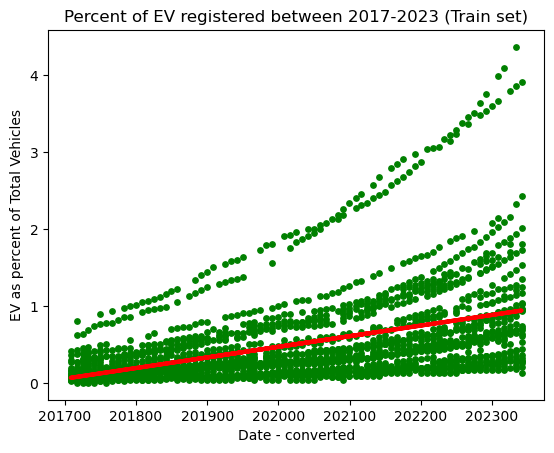

In [36]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Percent of EV registered between 2017-2023 (Train set)')
plot_test.xlabel('Date - converted')
plot_test.ylabel('EV as percent of Total Vehicles')
plot_test.show()

    The MSE is 0.26784357556225075 which indicates that, on average, the actual values deviate by approximately 0.26 percent from the predicted regression line. While this value seems small, however the dependent variable ranges between 0 to 4.12 percent and in that light the deviation is more significant. The data shows considerable variation, so while there is some accuracy to the model, some counties consistently deviate from the overall state average.

    The R2 score is 0.1974079500842213 - which suggests that the model is not a great fit to descibe the data, and large portion of the variance in the data may be attributed to other factors. It appears that the model better represents the overall (unweighted) average increase in the percentage of EVs of total vehicles across the entire state of Washington, rather than accurately predicting the percentage of EVs in a particular county.

    Possible methods to improve the model's performance: One option is to segment the data by individual counties or population density and create separate models for each group. This could account for regional variations and specific characteristics of different counties. Additionally, exploring alternative models beyond a simple linear regression line may lead to a better fit for the data.

    Data Bias - since the data is drawn from governement sources I do not think there is much bias from undersampling or data collection methods or from missing data. There data suggests that there is an urban-rural divide in terms of EV adoption. There may also be socioeconomic factors influencing how likelly people in different areas buy electric vehicles.  